In [38]:
# the original code is from https://github.com/bhaswara/CV_24T3/tree/main, created by Irfan Dwiki Bhaswaraimport
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report

In [39]:
# In this demo, we are using digits dataset in scikit-learn
from sklearn import datasets

digits = datasets.load_digits()
print('Digits dictionary content \n{}'.format(digits.keys()))

Digits dictionary content 
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


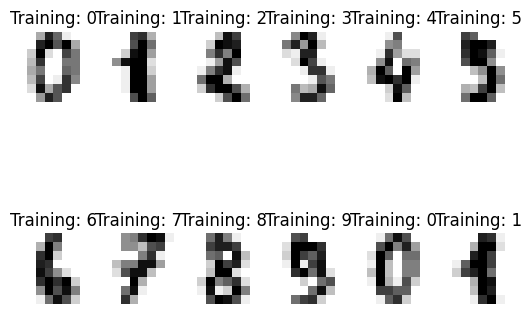

In [40]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (data, label) in enumerate(images_and_labels[:12]):
    imgdim=int(np.sqrt(digits.data[index].shape[0]))
    img=np.reshape(digits.data[index],(imgdim,imgdim))
    plt.subplot(2, 6, index + 1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.25)
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(1347, 64), (1347,)
Test data and target sizes: 
(450, 64), (450,)


In [42]:
## Using DT
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_predicts = dt.predict(X_test)

accuracy = accuracy_score(y_test, dt_predicts)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print(classification_report(y_test, dt_predicts))

Accuracy: 0.8511
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        46
           1       0.88      0.78      0.83        49
           2       0.80      0.92      0.85        38
           3       0.83      0.75      0.78        51
           4       0.88      0.83      0.85        52
           5       0.95      0.89      0.92        47
           6       0.95      0.89      0.92        44
           7       0.90      0.92      0.91        38
           8       0.71      0.79      0.75        43
           9       0.68      0.81      0.74        42

    accuracy                           0.85       450
   macro avg       0.86      0.85      0.85       450
weighted avg       0.86      0.85      0.85       450



In [43]:
## Using KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_predicts = knn.predict(X_test)

accuracy = accuracy_score(y_test, knn_predicts)
print(f'Accuracy Score: {accuracy:.4f}')

# Classification report
print(classification_report(y_test, knn_predicts))

Accuracy Score: 0.9933
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       0.98      1.00      0.99        49
           2       1.00      0.97      0.99        38
           3       0.98      1.00      0.99        51
           4       1.00      1.00      1.00        52
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        44
           7       0.97      1.00      0.99        38
           8       1.00      0.98      0.99        43
           9       1.00      0.98      0.99        42

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [44]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

sgd_predicts = sgd.predict(X_test)

accuracy = accuracy_score(y_test, sgd_predicts)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print(classification_report(y_test, sgd_predicts))

Accuracy: 0.9467
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.90      0.94      0.92        49
           2       1.00      0.97      0.99        38
           3       0.96      0.86      0.91        51
           4       0.94      0.94      0.94        52
           5       1.00      0.98      0.99        47
           6       1.00      0.95      0.98        44
           7       1.00      1.00      1.00        38
           8       0.97      0.88      0.93        43
           9       0.76      0.98      0.85        42

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



/Users/yangruiyi/opt/anaconda3/envs/unsw/lib/python3.9/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


MNIST dataset shape: (70000, 784), label shape: (70000,)


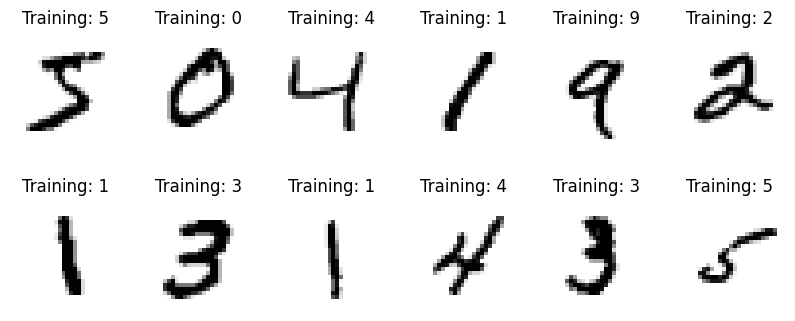

Training set size: (52500, 784), Test set size: (17500, 784)


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

print(f"MNIST dataset shape: {X.shape}, label shape: {y.shape}")

images_and_labels = list(zip(X, y))
plt.figure(figsize=(10, 4))
for index, (data, label) in enumerate(images_and_labels[:12]):
    img = np.reshape(data, (28, 28))
    plt.subplot(2, 6, index + 1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Training: {label}')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f'Training set size: {X_train.shape}, Test set size: {X_test.shape}')



In [49]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predicts = dt.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, dt_predicts):.4f}')
print(classification_report(y_test, dt_predicts))


Decision Tree Accuracy: 0.8718
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1714
           1       0.94      0.95      0.95      1977
           2       0.85      0.84      0.85      1761
           3       0.84      0.84      0.84      1806
           4       0.85      0.88      0.86      1587
           5       0.84      0.81      0.82      1607
           6       0.90      0.91      0.90      1761
           7       0.90      0.91      0.90      1878
           8       0.81      0.80      0.81      1657
           9       0.83      0.84      0.84      1752

    accuracy                           0.87     17500
   macro avg       0.87      0.87      0.87     17500
weighted avg       0.87      0.87      0.87     17500



In [50]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predicts = knn.predict(X_test)
print(f'KNN Accuracy: {accuracy_score(y_test, knn_predicts):.4f}')
print(classification_report(y_test, knn_predicts))


KNN Accuracy: 0.9693
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1714
           1       0.95      1.00      0.97      1977
           2       0.98      0.96      0.97      1761
           3       0.97      0.96      0.96      1806
           4       0.97      0.97      0.97      1587
           5       0.97      0.96      0.97      1607
           6       0.98      0.99      0.98      1761
           7       0.96      0.97      0.97      1878
           8       0.99      0.93      0.96      1657
           9       0.95      0.96      0.95      1752

    accuracy                           0.97     17500
   macro avg       0.97      0.97      0.97     17500
weighted avg       0.97      0.97      0.97     17500



In [51]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_predicts = sgd.predict(X_test)
print(f'SGD Accuracy: {accuracy_score(y_test, sgd_predicts):.4f}')
print(classification_report(y_test, sgd_predicts))

SGD Accuracy: 0.8866
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1714
           1       0.97      0.96      0.96      1977
           2       0.80      0.92      0.86      1761
           3       0.91      0.80      0.85      1806
           4       0.92      0.86      0.89      1587
           5       0.82      0.87      0.84      1607
           6       0.96      0.91      0.94      1761
           7       0.87      0.94      0.90      1878
           8       0.86      0.75      0.80      1657
           9       0.81      0.88      0.84      1752

    accuracy                           0.89     17500
   macro avg       0.89      0.88      0.88     17500
weighted avg       0.89      0.89      0.89     17500



In [52]:
'''
Hints and Steps reading Chinese MNIST
(1) Use csv file provided to split the dataset according to its classes. 
    You can create function which take the image path as well as class label
(2) To read the image, make sure to read it in grayscale and don't forget to flatten it.
(3) Use train_test_split from sklearn to split data. You can directly use your csv file into this. 
    Make sure to set the random_state to be the same and don't forget to use stratify so your classes have the same number.
    You can define the number of training and testing set as well
'''

"\nHints and Steps reading Chinese MNIST\n(1) Use csv file provided to split the dataset according to its classes. \n    You can create function which take the image path as well as class label\n(2) To read the image, make sure to read it in grayscale and don't forget to flatten it.\n(3) Use train_test_split from sklearn to split data. You can directly use your csv file into this. \n    Make sure to set the random_state to be the same and don't forget to use stratify so your classes have the same number.\n    You can define the number of training and testing set as well\n"

In [53]:
'''
About Chinese MNIST dataset
https://www.kaggle.com/datasets/gpreda/chinese-mnist/data

One hundred Chinese nationals took part in data collection. Each participant wrote with a standard black ink pen all 15 numbers 
in a table with 15 designated regions drawn on a white A4 paper. 
This process was repeated 10 times with each participant. Each sheet was scanned at the resolution of 300x300 pixels.

Code is used to map each single character and it will be the one used for the target variable.
Each character is present 1K times (15 characters = 15K entries) with own hand written image.
The total number of classes to predict are 15.

'''

'\nAbout Chinese MNIST dataset\nhttps://www.kaggle.com/datasets/gpreda/chinese-mnist/data\n\nOne hundred Chinese nationals took part in data collection. Each participant wrote with a standard black ink pen all 15 numbers \nin a table with 15 designated regions drawn on a white A4 paper. \nThis process was repeated 10 times with each participant. Each sheet was scanned at the resolution of 300x300 pixels.\n\nCode is used to map each single character and it will be the one used for the target variable.\nEach character is present 1K times (15 characters = 15K entries) with own hand written image.\nThe total number of classes to predict are 15.\n\n'